# Advertising Sales Channel Prediction

Problem Statement:

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import zscore
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("Advertising Sales Channel.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
(df==0).sum(axis=0)

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

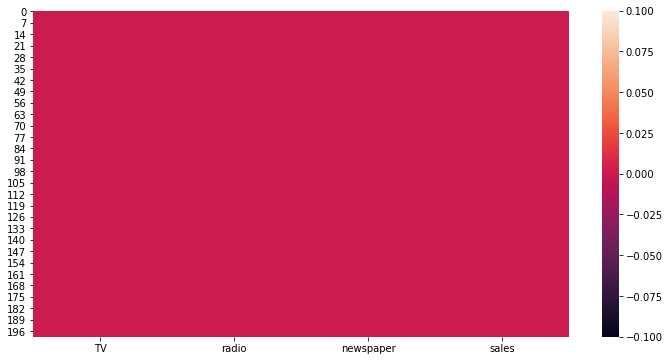

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

In [13]:
df.sales.value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

Exploratory Data Analysis

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


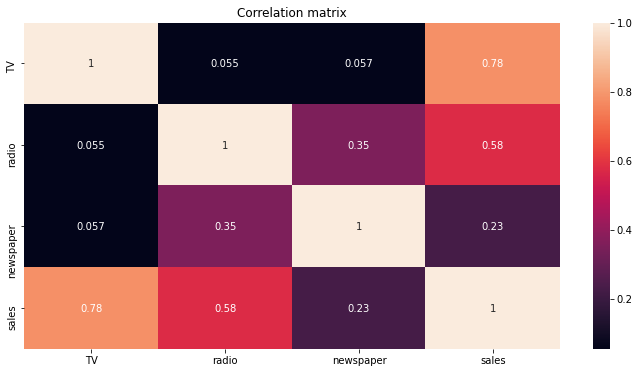

In [15]:
plt.figure(figsize=(12,6))
plt.title("Correlation matrix")
sns.heatmap(df.corr(), annot=True)
plt.show()

Pairplot

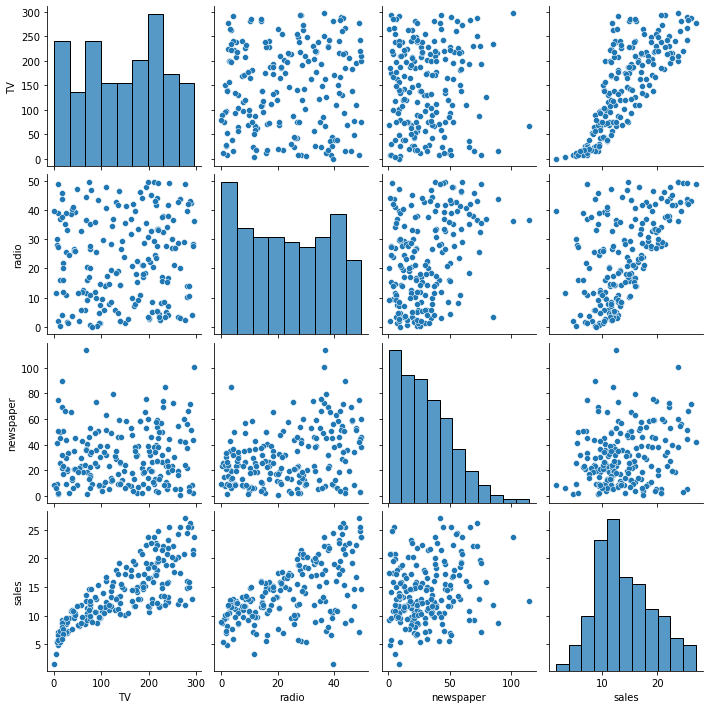

In [16]:
sns.pairplot(df)

Univariate analysis sales (target variable)

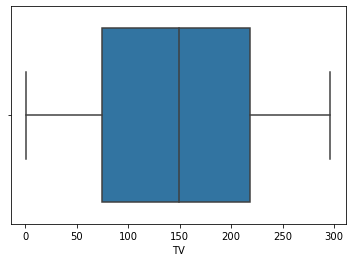

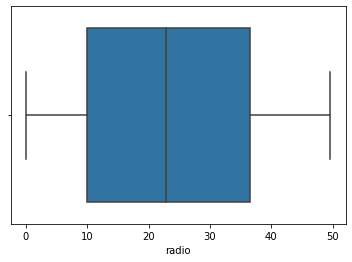

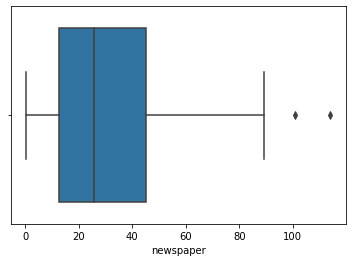

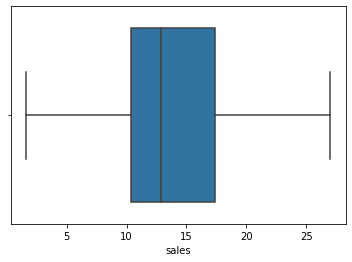

In [17]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

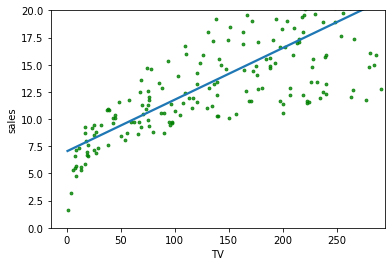

In [18]:
sns.regplot(df.TV, df.sales, order=1, ci=None, scatter_kws={'color':'g', 's':8})
plt.xlim(-15,295)                                                                 
plt.ylim(0,20)
plt.show()

<AxesSubplot:xlabel='TV', ylabel='sales'>

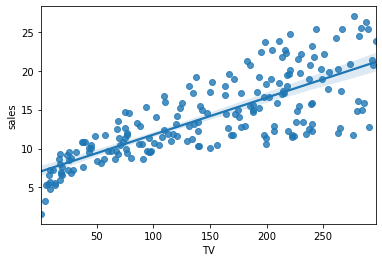

In [19]:
sns.regplot(x='TV', y='sales', data=df) 

<AxesSubplot:xlabel='radio', ylabel='sales'>

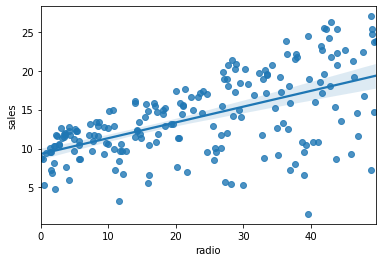

In [20]:
sns.regplot(x='radio', y='sales', data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

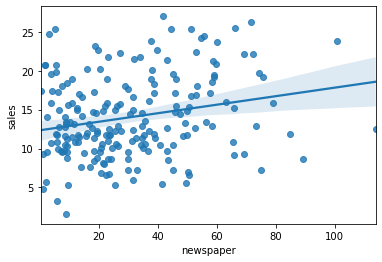

In [21]:
sns.regplot(x='newspaper', y='sales', data=df)

Model Building

In [41]:
X=df['TV']
y=df['sales']

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X, y,
         test_size=0.5, random_state=100)

In [43]:
print(X_train.shape)
print(X_test.shape)

(100,)
(100,)


In [44]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [45]:
print(X_train.shape)
print(X_test.shape)

(100, 1)
(100, 1)


In [46]:
print(X_test.shape)
print(y_test.shape)

(100, 1)
(100,)


In [47]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
reg.score(X_train, y_train)

0.6628433528818902

In [49]:
reg.coef_

array([0.04941632])

In [50]:
reg.intercept_

6.602810355958101

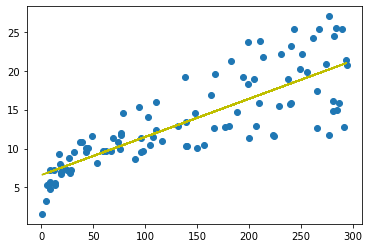

In [51]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.602+0.049*X_train, 'y')
plt.show()

In [52]:
y_train_pred=reg.predict(X_train)
print(y_train_pred[0:4])
print(y_train[0:4])
res=(y_train-y_train_pred)
print(res[0:4])

[17.88455531 20.96813343 20.28618827 16.4761903 ]
23     15.5
35     12.8
175    27.0
50     11.4
Name: sales, dtype: float64
23    -2.384555
35    -8.168133
175    6.713812
50    -5.076190
Name: sales, dtype: float64


Model Evaluation

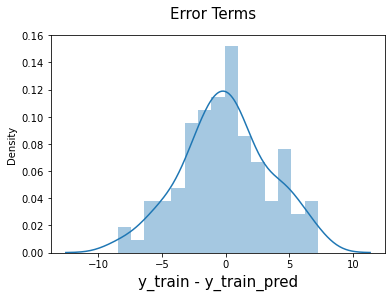

In [53]:
fig=plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize=15)    
plt.xlabel('y_train - y_train_pred', fontsize=15) 
plt.show()

Predictions of the set

In [54]:
y_pred=reg.predict(X_test)
print(y_test[0:4])
print(y_pred[0:4])

126     6.6
104    20.7
99     17.2
92     19.4
Name: sales, dtype: float64
[ 6.98825762 18.37377684 13.28389629 17.36074236]


In [55]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.0930087333207226

In [56]:
r_squared=r2_score(y_test, y_pred)
r_squared

0.5110290209784486

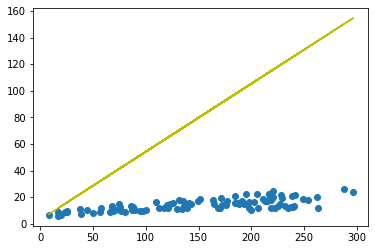

In [58]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 3.093+0.511*X_test, 'y')
plt.show()

Saving the data

In [59]:
filename="Advertising Sales.pkl"
pickle.dump(y_pred, open(filename, 'wb'))